In [295]:
#importing the required libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

#scikit learn machine learning ki library hai
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [296]:
electronics_rf=pd.read_csv('C:/Users/sanjeev/Downloads/Minor/Databases/product_reviews2.csv')

In [297]:
electronics_rf.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[['Electronics', 'GPS & Navigation', 'Vehicle ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[['Electronics', 'GPS & Navigation', 'Vehicle ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[['Electronics', 'GPS & Navigation', 'Vehicle ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [298]:
electronics_rf.drop(['helpful','reviewText','summary','unixReviewTime','reviewTime','imUrl','description','categories','salesRank','related','brand'],axis=1,inplace=True)

In [299]:
electronics_rf.columns=['userId','productId','user_name','ratings','product_name','price']

In [300]:
electronics_df=electronics_rf.drop(['user_name','product_name','price'],axis=1)

In [301]:
electronics_df.head(5)

,userId,productId,ratings
0,AO94DHGC771SJ,0528881469,5.0
1,AMO214LNFCEI4,0528881469,1.0
2,A3N7T0DY83Y4IG,0528881469,3.0
3,A1H8PY3QHMQQA0,0528881469,2.0
4,A24EV6RXELQZ63,0528881469,1.0


In [302]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643686 entries, 0 to 1643685
Data columns (total 3 columns):
userId       1643686 non-null object
productId    1643686 non-null object
ratings      1643686 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.6+ MB


In [303]:
#Check the number of rows and columns
rows,columns=electronics_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  1643686
Number of columns:  3


In [304]:
#Taking subset of the dataset
#through .sample rows are randomly selected we can also specify the number of rows to be selected
electronics_df1=electronics_df.sample(n=300000)

In [305]:
electronics_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1169075 to 1494987
Data columns (total 3 columns):
userId       300000 non-null object
productId    300000 non-null object
ratings      300000 non-null float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB


In [306]:
#Summary statistics of rating variable
electronics_df1['ratings'].describe().transpose()

count    300000.000000
mean          4.222967
std           1.184623
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: ratings, dtype: float64

In [307]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_df1.ratings.min()))
print('Maximum rating is: %d' %(electronics_df1.ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


In [308]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_df.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
ratings      0
dtype: int64


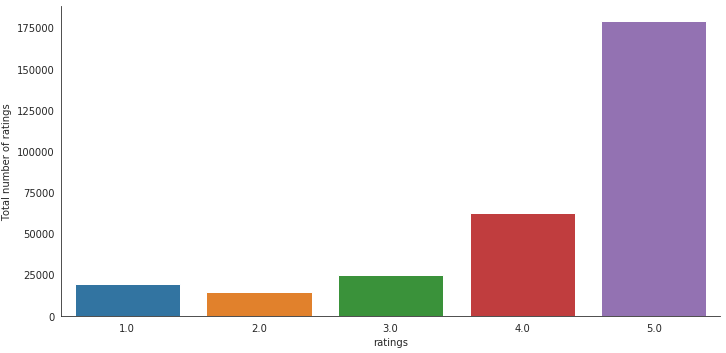

In [309]:
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=electronics_df1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [310]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', electronics_df1['userId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', electronics_df1['productId'].nunique())

Number of unique users in Raw data =  143799
Number of unique product in Raw data =  52785


In [311]:
#Check the top 10 users based on ratings
most_rated=electronics_df1.groupby('userId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userId
A3OXHLG6DIBRW8    69
ADLVFFE4VBT8      66
A1ODOGXEYECQQ8    59
A5JLAU2ARJ0BO     59
A2NOW4U7W3F7RI    54
A680RUE1FDO8B     49
A3LGT6UZL99IW1    49
A22CW0ZHY3NJH8    46
A6FIAB28IS79      45
A25C2M3QF9G7OQ    45
dtype: int64


In [312]:
counts=electronics_df1.userId.value_counts()
electronics_df1_final=electronics_df1[electronics_df1.userId.isin(counts[counts>=7].index)]
print('Number of users who have rated 7 or more items =', len(electronics_df1_final))
print('Number of unique users in the final data = ', electronics_df1_final['userId'].nunique())
print('Number of unique products in the final data = ', electronics_df1_final['userId'].nunique())


Number of users who have rated 7 or more items = 33043
Number of unique users in the final data =  3194
Number of unique products in the final data =  3194


In [314]:
#constructing the pivot table
final_ratings_matrix = electronics_df1_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productId,0972683275,1400501466,1400532620,1400532655,140053271X,1400698987,9575871979,9983891204,9983891212,998498480X,...,B00KOHQU58,B00KOLNVAQ,B00KONCDVM,B00KSLCU72,B00KWHMR6G,B00KXAFYZS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1016Q5UDME15Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10471FSILZ25C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (3194, 17100)


In [316]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  33043
possible_num_of_ratings =  54617400
density: 0.06%


In [317]:
#Spliting the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(electronics_df1_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,ratings
127288,A1JOCFRO3UC0QE,B000653HL8,4.0
640685,A141R97FHSSUQ0,B002RL875A,4.0
1482297,A3B02JLK2QV8Z,B00AEGFFM8,5.0
107995,AVSMRPI23DQI2,B0002GDIII,5.0
511550,ANEDXRFDZDL18,B001QXDN5O,3.0


In [318]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (23130, 3)
Shape of testing data:  (9913, 3)


In [319]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head(10)

,productId,score
0,0972683275,2
1,1400532655,1
2,9983891204,1
3,9983891212,2
4,B00000IGBF,1
5,B00000J061,1
6,B00000J1EP,1
7,B00000J1SC,1
8,B00000J1TX,1
9,B00000J1UQ,1


In [320]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(10) 
popularity_recommendations

,productId,score,rank
10644,B007WTAJTO,57,1.0
6428,B003ES5ZUU,51,2.0
10878,B0088CJT4U,39,3.0
2470,B000N99BBC,32,4.0
2706,B000QUUFRW,30,5.0
5644,B002SZEOLG,30,6.0
7229,B0041Q38NU,30,7.0
5727,B002V88HFE,28,8.0
10981,B008DWCRQW,28,9.0
3682,B0019EHU8G,27,10.0


In [321]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [322]:
find_recom = [10]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 10

       userId   productId  score  rank
10644      10  B007WTAJTO     57   1.0
6428       10  B003ES5ZUU     51   2.0
10878      10  B0088CJT4U     39   3.0
2470       10  B000N99BBC     32   4.0
2706       10  B000QUUFRW     30   5.0
5644       10  B002SZEOLG     30   6.0
7229       10  B0041Q38NU     30   7.0
5727       10  B002V88HFE     28   8.0
10981      10  B008DWCRQW     28   9.0
3682       10  B0019EHU8G     27  10.0




In [323]:
electronics_df_CF = pd.concat([train_data, test_data]).reset_index()
electronics_df_CF.head()

,index,userId,productId,ratings
0,127288,A1JOCFRO3UC0QE,B000653HL8,4.0
1,640685,A141R97FHSSUQ0,B002RL875A,4.0
2,1482297,A3B02JLK2QV8Z,B00AEGFFM8,5.0
3,107995,AVSMRPI23DQI2,B0002GDIII,5.0
4,511550,ANEDXRFDZDL18,B001QXDN5O,3.0


In [324]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = electronics_df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

MemoryError: Unable to allocate 52.1 MiB for an array with shape (3194, 17100) and data type bool

In [222]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (3079, 16654)


In [224]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0972683275,1400501520,1400501776,1400532655,140053271X,1400599997,1400698987,7507825604,9573212900,9575871979,...,B00KNM763E,B00KOHKRXE,B00KOHQU58,B00KVNY2KA,B00KXAFYZS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A107K10JTO8NSH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [225]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

productId,0972683275,1400501520,1400501776,1400532655,140053271X,1400599997,1400698987,7507825604,9573212900,9575871979,...,B00KMRGF3M,B00KNM763E,B00KOHKRXE,B00KOHQU58,B00KVNY2KA,B00KXAFYZS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [227]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-6.41782375e-02  6.94972293e-03  1.26671112e-02 ...  5.14585602e-05
  -6.04973712e-04  1.87216160e-02]
 [-3.16623341e-03 -2.07821811e-03 -7.45940786e-03 ... -7.10095070e-03
  -5.38447684e-03  7.30841055e-03]
 [-1.33507168e-03 -8.69379066e-04 -1.22649854e-03 ... -2.59802464e-04
  -7.18208918e-04  3.10642335e-03]
 ...
 [-1.29210041e-02  4.96471525e-03  3.44789127e-03 ...  2.15864956e-05
  -1.23520101e-03  4.74006379e-03]
 [-8.59417524e-04 -3.78657862e-04 -1.54688588e-02 ... -1.26988006e-03
  -3.77471508e-03  5.65569291e-03]
 [-8.13659245e-03  1.47629891e-03  4.53932090e-03 ...  3.49694207e-05
  -4.95426582e-03  7.43019333e-03]]


In [228]:
print('Sigma: \n',sigma)

Sigma: 
 [36.43506085 36.93098855 36.96899384 37.90360698 38.22815491 40.25394647
 40.88170774 42.10661834 42.80808521 47.47312228]


In [229]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[36.43506085  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         36.93098855  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         36.96899384  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         37.90360698  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         38.22815491  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         40.25394647
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  40.88170774  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         42.10661834  0.          0.        ]
 [ 0.          0.          0.        

In [230]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-9.11828235e-05 -3.45128568e-05  3.06626478e-04 ... -4.01127114e-02
  -3.25924159e-04 -1.06121536e-02]
 [ 1.18475042e-03 -2.42030986e-03 -3.70812753e-03 ...  7.19089765e-03
   1.75742848e-04  3.07103838e-03]
 [-6.95827831e-04  4.56510694e-04 -1.14354211e-02 ...  1.50516635e-02
   8.90161495e-04  6.36788103e-03]
 ...
 [ 6.95208011e-05 -1.68851647e-05  3.19031543e-03 ...  2.81206537e-03
   1.50503064e-04  1.56142061e-03]
 [-1.49899920e-03  7.23467153e-05  6.56628863e-03 ... -1.03055564e-04
  -2.42276415e-03  8.40623777e-03]
 [ 3.17244411e-03  8.19503801e-04  1.00259011e-02 ...  1.92393137e-02
   1.88001090e-03  1.66759461e-02]]


In [231]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0972683275,1400501520,1400501776,1400532655,140053271X,1400599997,1400698987,7507825604,9573212900,9575871979,...,B00KMRGF3M,B00KNM763E,B00KOHKRXE,B00KOHQU58,B00KVNY2KA,B00KXAFYZS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
0,0.003970,0.000673,0.000720,0.001043,0.002848,0.001963,2.116563e-05,-0.001266,-0.000994,0.001216,...,0.001071,0.099625,0.005427,0.005427,0.038229,0.127181,0.142804,0.133635,0.005150,0.039808
1,0.001905,0.000091,0.004773,0.000564,0.001152,0.000207,-5.192730e-05,0.000763,0.001441,0.000887,...,0.000223,0.014876,0.000538,0.000538,0.008737,0.018597,0.012125,0.008578,0.001821,-0.000372
2,0.000612,0.000122,0.002011,0.000154,0.000229,0.000085,-1.824067e-07,0.000222,0.000113,0.000204,...,0.000072,0.005985,0.000186,0.000186,0.002422,0.005991,0.004578,0.004357,0.000560,0.001450
3,0.001193,-0.000139,-0.001281,-0.000056,0.000038,0.000138,-1.012226e-05,0.000230,0.004198,-0.000141,...,0.000007,-0.001122,0.000078,0.000078,-0.000594,-0.002320,0.002818,0.003266,-0.000390,-0.000375
4,0.001574,0.003863,-0.000014,0.000281,0.000643,0.000467,1.261402e-04,0.000014,0.001368,0.000251,...,0.000192,0.013765,0.001038,0.001038,0.003794,0.013920,0.019488,0.018855,0.000656,0.008515


In [232]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [233]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B0019EHU8G                  0.0          0.254486
B002V88HFE                  0.0          0.204889
B005FYNSPK                  0.0          0.196643
B00829TIEK                  0.0          0.157487
B00829THK0                  0.0          0.114758


In [234]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          0.353025
B00829TIEK                  0.0          0.180277
B003ES5ZUU                  0.0          0.127937
B007WTAJTO                  0.0          0.115449
B000VX6XL6                  0.0          0.103482


In [235]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B000N99BBC                  0.0          0.077705
B003ES5ZUU                  0.0          0.064489
B00834SJNA                  0.0          0.041578
B004CLYEFK                  0.0          0.036179
B002V88HFE                  0.0          0.032312


In [238]:
# Actual ratings given by the users
final_ratings_matrix.head(10)

productId,0972683275,1400501520,1400501776,1400532655,140053271X,1400599997,1400698987,7507825604,9573212900,9575871979,...,B00KMRGF3M,B00KNM763E,B00KOHKRXE,B00KOHQU58,B00KVNY2KA,B00KXAFYZS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A107K10JTO8NSH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108EEYSHGDL6O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108XABRHAA9E7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109XLG7SJQAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AAULK3SQEK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productId
0972683275    0.007795
1400501520    0.002273
1400501776    0.001299
1400532655    0.005196
140053271X    0.001624
dtype: float64

In [240]:
# Predicted ratings 
preds_df.head()

productId,0972683275,1400501520,1400501776,1400532655,140053271X,1400599997,1400698987,7507825604,9573212900,9575871979,...,B00KMRGF3M,B00KNM763E,B00KOHKRXE,B00KOHQU58,B00KVNY2KA,B00KXAFYZS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
0,0.003970,0.000673,0.000720,0.001043,0.002848,0.001963,2.116563e-05,-0.001266,-0.000994,0.001216,...,0.001071,0.099625,0.005427,0.005427,0.038229,0.127181,0.142804,0.133635,0.005150,0.039808
1,0.001905,0.000091,0.004773,0.000564,0.001152,0.000207,-5.192730e-05,0.000763,0.001441,0.000887,...,0.000223,0.014876,0.000538,0.000538,0.008737,0.018597,0.012125,0.008578,0.001821,-0.000372
2,0.000612,0.000122,0.002011,0.000154,0.000229,0.000085,-1.824067e-07,0.000222,0.000113,0.000204,...,0.000072,0.005985,0.000186,0.000186,0.002422,0.005991,0.004578,0.004357,0.000560,0.001450
3,0.001193,-0.000139,-0.001281,-0.000056,0.000038,0.000138,-1.012226e-05,0.000230,0.004198,-0.000141,...,0.000007,-0.001122,0.000078,0.000078,-0.000594,-0.002320,0.002818,0.003266,-0.000390,-0.000375
4,0.001574,0.003863,-0.000014,0.000281,0.000643,0.000467,1.261402e-04,0.000014,0.001368,0.000251,...,0.000192,0.013765,0.001038,0.001038,0.003794,0.013920,0.019488,0.018855,0.000656,0.008515


In [241]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0972683275    0.001792
1400501520    0.000875
1400501776    0.002841
1400532655    0.000271
140053271X    0.000496
dtype: float64

In [242]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(16654, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0972683275,0.007795,0.001792,0
1400501520,0.002273,0.000875,1
1400501776,0.001299,0.002841,2
1400532655,0.005196,0.000271,3
140053271X,0.001624,0.000496,4


In [243]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00247 



In [249]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 1278
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1278):

                   user_ratings  user_predictions
Recommended Items                                
B005HMKKH4                  0.0          0.100772
B002QEBMAK                  0.0          0.100208
B002V88HFE                  0.0          0.099794
B007I5JT4S                  0.0          0.087762
B001FA1NK0                  0.0          0.073825
